# Preliminary to Breaking down into Research Questions

Since we have many models, checkpoints and saliency maps, it was important to have an easy access to those things.
We have `RQ.weight_parser.py` module to achieve our needs and here are the basic usage.

In default, all weights are saved in `meta_brain/weights/default` directory.
Other than `default` directoy contains ablation studies/checkpoints of some models and they may not contain target saliency methods or checkpoints in need.

### Naming Protocols
They're naively named after model name, e.g. resnet10.
Since we also deals with seed variability, we have a suffix that represents seed number, i.e. resnet10-seed42

### Attributes

- Meta Information
  - `prediction`: Inference results on test dataset
  - `config`: Hydra config yaml file used to batch the experiment
  - `ckpt_dict`: Dictionary of checkpoints with parsed information on step-performance.
  - `test_performance`: Test inference performance on 3,029 brains. `__repr__` will hold this value in string as well.

- XAI Information
  - `xai_dict`: Projected RoI Saliency key-value dict, averaged across 3,029 brains
  - `xai_dict_indiv`: Projected RoI Saliency key-list, where each list contains 3,029 individuals saliency maps.
  - `img_dict`: All image files PosixPath. Images include visualization of saliency map via nilearn.
  - `attrs`: `np.ndarray` of total averaged saliency maps without top-k value extracted.
  - `top_attr`: `np.ndarray` of averaged across top-k saliency maps.

Note that each XAI information can be set after `load_xai` method. This is to ensure that _which_ XAI method information is being extracted, since there are multiple methods of XAI.

## Fetching Base Information

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from weight_parser import Weights

resnet10_42 = Weights(model_name="resnet10", seed=42)

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Set base_path as /home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42
INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Loading Basic Information


In [2]:
resnet10_42.prediction

{'loss': tensor([ 6.2137,  8.0652,  9.3728,  5.8538, 11.1017,  8.5276,  6.2850,  7.2876,
          7.7513,  7.4274,  4.1983,  7.4217, 11.0773,  8.5593,  6.0406,  8.3781,
          8.2801,  8.2981, 10.1308, 11.3680,  7.9729, 12.9950,  6.4773,  7.7737,
          8.5007,  7.0120, 11.1875,  5.0891, 11.1648,  4.4282, 11.7956,  7.9476,
         14.5635,  6.7906,  5.8292,  4.2312,  7.1647,  8.0685, 10.0688,  9.1398,
          8.5182,  7.2500, 12.5411,  9.4444, 10.9574,  9.5324,  9.0551, 13.1040,
          8.3968, 11.4155, 10.5316, 10.0292, 10.2100,  8.0187,  5.5889,  8.4523,
          9.5314,  7.8649, 10.3646, 12.1804, 12.2662,  7.1119,  5.1414, 11.4852,
          6.3505,  9.4055,  8.6564, 10.5043, 10.3433,  6.8997,  8.2355,  7.1531,
          8.9989,  9.3866,  7.7732,  7.6793,  7.6626, 11.9050,  7.8146,  4.1194,
          7.1830,  9.2069,  4.6731,  7.8117,  9.5487,  7.0960,  9.8278, 15.2344,
         11.8862,  8.4660, 10.8889,  8.7563,  7.3377,  7.6573,  9.0259]),
 'pred': tensor([69.9876, 5

In [3]:
resnet10_42.config

{'model': {'_target_': 'sage.models.base.ResNet', 'backbone': {'_target_': 'sage.models.model_zoo.resnet.build_resnet', 'model_depth': 10}, 'criterion': {'_target_': 'torch.nn.MSELoss'}, 'name': 'resnet10'}, 'dataset': {'_target_': 'sage.data.dataloader.UKBDataset', 'root': 'biobank', 'label_name': None, 'mode': 'train', 'valid_ratio': 0.1, 'seed': '${misc.seed}'}, 'scheduler': {'scheduler': {'_target_': 'sage.trainer.scheduler.CosineAnnealingWarmupRestarts', 'first_cycle_steps': 3000, 'cycle_mult': 2, 'max_lr': 0.001, 'min_lr': 1e-07, 'warmup_steps': 2000, 'gamma': 0.5, 'last_epoch': -1}, 'interval': 'step', 'frequency': 1, 'strict': False}, 'optim': {'_target_': 'lion_pytorch.Lion', 'lr': 0.0001, 'weight_decay': 1.0}, 'trainer': {'_target_': 'pytorch_lightning.Trainer', 'max_epochs': 300, 'devices': 1, 'accelerator': 'gpu', 'gradient_clip_val': 1, 'log_every_n_steps': 50, 'accumulate_grad_batches': 1, 'deterministic': False}, 'dataloader': {'_target_': 'torch.utils.data.DataLoader', 

In [4]:
resnet10_42.ckpt_dict

{'steps': [(50000, 7.09),
  (1000, 325.189),
  (25000, 9.316),
  (250, 3403.1),
  (10000, 13.198)],
 'last': PosixPath('/home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/last.ckpt'),
 'best': PosixPath('/home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/41280-valid_mae2.319.ckpt'),
 'best_valid_mae': [(41280, 2.319)]}

In [5]:
resnet10_42.test_performance

{'mse': 8.697, 'mae': 2.321, 'r2': 0.851}

## Fetching Informations of Explainability methods 



In [6]:
resnet10_42.load_xai(xai_method="gbp")

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Loading XAI information from /home/daehyun/codespace/brain-age-prediction/meta_brain/weights/default/resnet10-42/gbpk0.99


In [7]:
resnet10_42.xai_dict

{'3rd-Ventricle': 2.4582463297497754,
 '4th-Ventricle': 0.5277671993674635,
 'Brain-Stem': 0.5618218134908076,
 'CSF': 0.3217413851618062,
 'Left-Accumbens-area': 0.5873839106282162,
 'Left-Amygdala': 0.21411370237151459,
 'Left-Caudate': 0.5765013636102552,
 'Left-Cerebellum-Cortex': 0.7269608816532309,
 'Left-Cerebellum-White-Matter': 1.8170964775774903,
 'Left-Cerebral-White-Matter': 0.18204985494908643,
 'Left-Hippocampus': 0.19916186747121872,
 'Left-Inf-Lat-Vent': 0.711798859749084,
 'Left-Lateral-Ventricle': 0.6680927954281548,
 'Left-Pallidum': 2.1877445579216306,
 'Left-Putamen': 1.565493310269036,
 'Left-Thalamus': 0.6225808205610278,
 'Left-VentralDC': 1.0087931448486143,
 'Left-choroid-plexus': 0.5277808912307679,
 'Right-Accumbens-area': 1.8733258953723335,
 'Right-Amygdala': 0.043853988338202504,
 'Right-Caudate': 1.2556543141177927,
 'Right-Cerebellum-Cortex': 0.5069766247892279,
 'Right-Cerebellum-White-Matter': 3.8353672821750666,
 'Right-Cerebral-White-Matter': 0.1449

In [8]:
resnet10_42.xai_dict_indiv

3rd-Ventricle  4th-Ventricle  Brain-Stem       CSF  Left-Accumbens-area  \
0          3.327417       1.598277    1.541760  1.250582             2.603299   
1          3.613529       1.179359    1.298270  1.216466             2.317716   
2          3.429285       1.359288    1.526792  1.256514             1.929971   
3          3.204730       1.211987    1.369898  1.370419             2.391498   
4          4.407816       1.496250    1.321748  1.531281             2.240146   
...             ...            ...         ...       ...                  ...   
3024       2.726379       1.543324    1.572063  1.176560             2.543336   
3025       2.527887       1.761203    1.452583  1.001066             1.566044   
3026       2.607433       1.291626    1.557222  1.289146             2.140340   
3027       3.994590       1.340250    1.537061  1.296646             2.823710   
3028       3.848490       1.470855    1.420312  1.326895             1.887337   

      Left-Amygdala  Left-Caudate  Left-Cerebellum-Cortex  \
0          0.866415      1.548626                1.491068   
1          0.749060      1.839868                1.319800   
2          0.877306      1.741518                1.672174   
3          1.243926      1.736308                1.591741   
4          0.665935      2.348129                1.199114   
...             ...           ...                     ...   
3024       0.831041      1.844595                1.627448   
3025       0.824948      1.355006                1.690418   
3026       0.690228      1.764345                1.573169   
3027       0.824684      2.072098                1.363978   
3028       0.801840      1.611243                1.603927   

      Left-Cerebellum-White-Matter  Left-Cerebral-White-Matter  ...  \
0                         3.112757                    0.703633  ...   
1                         2.108512                    0.743607  ...   
2                         2.830018                    0.763004  ...   
3                         2.704795                    0.752110  ...   
4                         2.064623                    0.923292  ...   
...                            ...                         ...  ...   
3024                      2.874741                    0.759934  ...   
3025                      3.276040                    0.669910  ...   
3026                      2.792306                    0.706655  ...   
3027                      2.315895                    0.825723  ...   
3028                      3.021395                    0.743674  ...   

      ctx-rh-posteriorcingulate  ctx-rh-precentral  ctx-rh-precuneus  \
0                      1.154379           0.233960          0.360957   
1                      1.091243           0.268354          0.354618   
2                      1.087272           0.304200          0.422832   
3                      1.302269           0.219114          0.356851   
4                      1.126129           0.385776          0.599740   
...                         ...                ...               ...   
3024                   1.254297           0.300203          0.385891   
3025                   1.013057           0.240826          0.450788   
3026                   1.024513           0.212784          0.359834   
3027                   1.083062           0.266532          0.385242   
3028                   1.297577           0.243264          0.354919   

      ctx-rh-rostralanteriorcingulate  ctx-rh-rostralmiddlefrontal  \
0                            1.050051                     0.264381   
1                            1.412816                     0.297021   
2                            1.427657                     0.299117   
3                            1.230592                     0.169616   
4                            1.474531                     0.368796   
...                               ...                          ...   
3024                         1.229101                     0.286146   
3025                  

In [9]:
resnet10_42.attrs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Performance Table

### Age Regression

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import constants as C
from weight_parser import WeightAvg, WeightsCls

In [11]:
avg_dict = dict()
performance_table = dict()
for model in C.MODELS:
    avg = WeightAvg(model_name=model, xai_method="", seeds=C.SEEDS)
    avg_dict[model] = avg
    performance_table[model] = avg.test_performance

INFO:/home/daehyun/codespace/brain-age-prediction/RQ/weight_parser.py:Load all seeds: range(42, 52)


0.8220022222222221


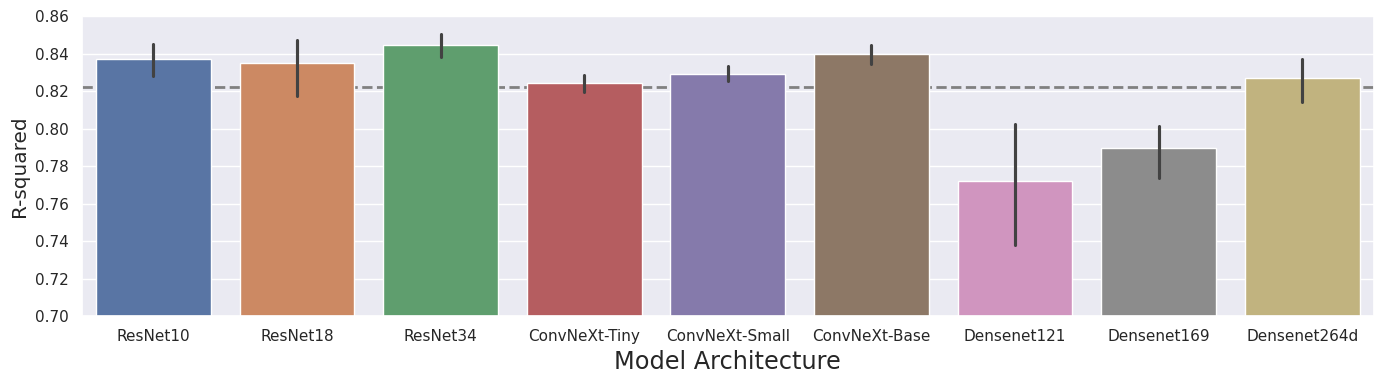

In [20]:
metric = "r2"

pdf = dict()
for model in avg_dict:
    _avg = avg_dict[model]
    key = C.MODEL_KEY.get(model)
    pdf[key] = [_avg.seed_dict[seed].test_performance[metric] for seed in _avg.seed_dict]
pdf = pd.DataFrame(pdf)

fig, ax = plt.subplots(figsize=(14, 4))
sns.barplot(pdf, ax=ax)

ls = "x-large"
reg_metric_name = {
    "mse": "Mean Squared Error (yrs)",
    "mae": "Mean Absolute Error (yrs)",
    "r2": "R-squared"
}[metric]
ax.set_ylabel(reg_metric_name, size="large")
if metric == "mae":
    ax.set_ylim(2.25, 3.3)
elif metric == "r2":
    ax.set_ylim(0.70, 0.86)
elif metric == "mse":
    ax.set_ylim(8, 17)
ax.set_xlabel("Model Architecture", size=ls)
ax.axhline(pdf.values.mean(), linestyle="--", color="gray", linewidth=2, zorder=0)
print(pdf.values.mean())

fig.tight_layout()
fig.savefig(fname=C.ASSET_DIR / f"task_performance_{metric}.png", dpi=150, bbox_inches="tight")

pdf = pdf.melt()
pdf = pdf.rename({"value": reg_metric_name}, axis=1)

### ADNI

In [15]:
avg_dict_adni = dict()
performance_table = dict()
for model in C.MODELS:
    avg = WeightAvg(model_name=f"{model}-binary", xai_method="", reg=False,
                    seeds=C.SEEDS, base_dir=Path("../adni_training/extra_final/extra"))
    avg_dict_adni[model] = avg
    performance_table[model] = avg.test_performance

In [16]:
avg_dict_adni['resnet10']

0.9084300000000001


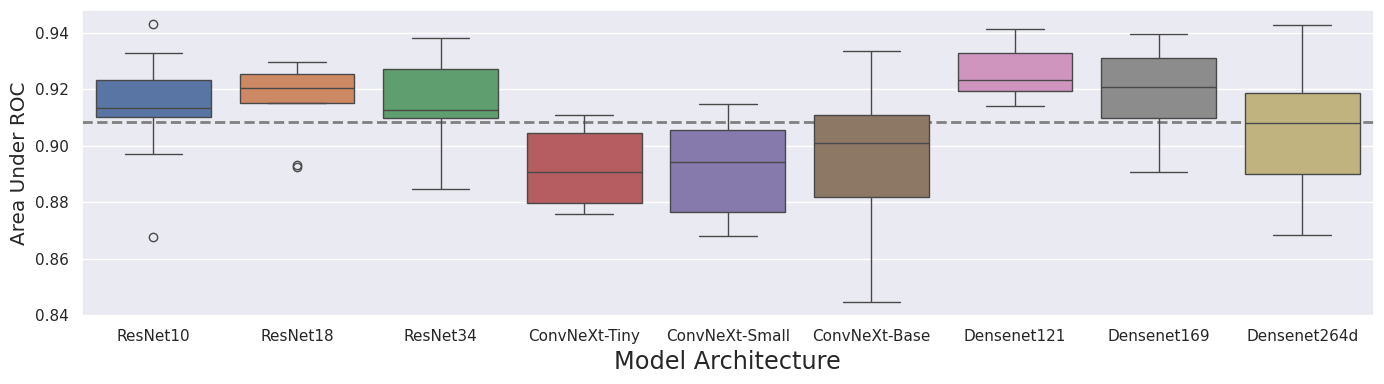

In [17]:
metric = "auroc"

pdf_adni = dict()
for model in avg_dict_adni:
    _avg = avg_dict_adni[model]
    key = C.MODEL_KEY.get(model)
    pdf_adni[key] = [_avg.seed_dict[seed].test_performance[metric] for seed in _avg.seed_dict]
pdf_adni = pd.DataFrame(pdf_adni)

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(pdf_adni, ax=ax)

ls = "x-large"
cls_metric_name = {
    "f1": "F1-score",
    "acc": "Accuracy (%)",
    "auroc": "Area Under ROC"}[metric]
ax.set_ylabel(cls_metric_name, size="large")
ax.set_xlabel("Model Architecture", size=ls)
ax.axhline(pdf_adni.values.mean(), linestyle="--", color="gray", linewidth=2, zorder=0)
print(pdf_adni.values.mean())

fig.tight_layout()
fig.savefig(fname=C.ASSET_DIR / f"task_performance_{metric}.png", dpi=150, bbox_inches="tight")

pdf_adni = pdf_adni.melt()
pdf_adni = pdf_adni.rename({"value": cls_metric_name}, axis=1)

Merge two performance plots into one

In [21]:
df = pd.concat([pdf, pdf_adni[cls_metric_name]], axis=1)
df = df.rename({"variable": "model_name"}, axis=1)

model_names = df.model_name.unique().tolist()

# 각 모델별 평균 및 표준편차 계산
model_stats = df.groupby('model_name').agg({
    reg_metric_name: ['mean', 'sem'],
    cls_metric_name: ['mean', 'sem']
}).reset_index()

# 컬럼명 단순화
model_stats.columns = ['model', 'reg_mean', 'reg_std', 'cls_mean', 'cls_std']

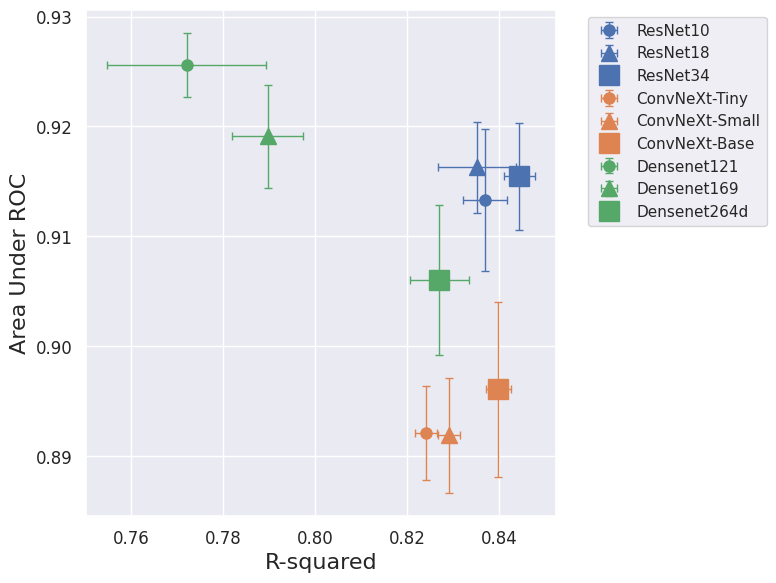

In [22]:
plt.figure(figsize=(8, 6))

cmap = sns.color_palette("deep")
markers = ['o', '^', 's']

# 각 모델별 크기 설정 (같은 그룹 내에서 크기 다르게)
model_sizes = {
    "ResNet10": 8, "ResNet18": 12, "ResNet34": 14,
    "ConvNeXt-Tiny": 8, "ConvNeXt-Small": 12, "ConvNeXt-Base": 14,
    "Densenet121": 8, "Densenet169": 12, "Densenet264d": 14
}

for i, model in enumerate(model_names):
    model_data = model_stats[model_stats['model'] == model]
    
    if model.startswith("ResNet"):
        c = cmap[0]
    elif model.startswith("ConvNeXt"):
        c = cmap[1]
    elif model.startswith("Densenet"):
        c = cmap[2]

    if model.endswith(("10", "Tiny", "121")):
        m = markers[0]
    elif model.endswith(("18", "Small", '169')):
        m = markers[1]
    elif model.endswith(("264d", "34", "Base")):
        m = markers[2]

    plt.errorbar(
        x=model_data['reg_mean'], 
        y=model_data['cls_mean'],
        xerr=model_data['reg_std'],
        yerr=model_data['cls_std'],
        fmt=m,
        label=f"{model}",
        color=c,
        markersize=model_sizes[model],
        capsize=3,
        capthick=1,
        elinewidth=1
    )

# 그래프 레이블 및 제목 설정
plt.xlabel(reg_metric_name, fontsize=16)  # Regression Performance로 변경 가능
plt.ylabel(cls_metric_name, fontsize=16)  # Classification Performance로 변경 가능
# 범례 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 타이틀 (원하는 경우)
# plt.title('Performance Comparison of Different Model Architectures')

plt.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)
plt.tick_params(axis='both', which='minor', width=1, length=3)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.savefig('model_performance_comparison.pdf', format="pdf", dpi=100, bbox_inches='tight')
plt.show()

# Visualization of Conventional Methods

In [24]:
import numpy as np
import nibabel as nib
import nilearn.plotting as nilp

import metadata as m

%cd ..
from sage.xai.atlas import get_atlas
from sage.xai.atlas_overlap import project_to_atlas
import sage.xai.nilearn_plots as nilp_
%cd RQ

dkt = get_atlas(atlas_name="dkt")
# nilp.plot_roi(dkt.nii, view_type="contours", display_mode="mosaic")

plot_kwargs = dict(atlas=dkt, use_abs=False)

/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/home/daehyun/.conda/envs/age/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
INFO:/home/daehyun/codespace/brain-age-prediction/sage/xai/atlas.py:Load dkt atlas.


/home/daehyun/codespace
[Errno 2] No such file or directory: 'RQ'
/home/daehyun/codespace


#### ATLAS Plots

In [ ]:
dkt_ctx = dkt.array.copy()
dkt_sub = dkt.array.copy()
for roi, index in zip(dkt.labels, dkt.indices):
    if roi.startswith("ctx-"):
        dkt_sub = np.where(dkt_sub == index, 0, dkt_sub)
    else:
        dkt_ctx = np.where(dkt_ctx == index, 0, dkt_ctx)

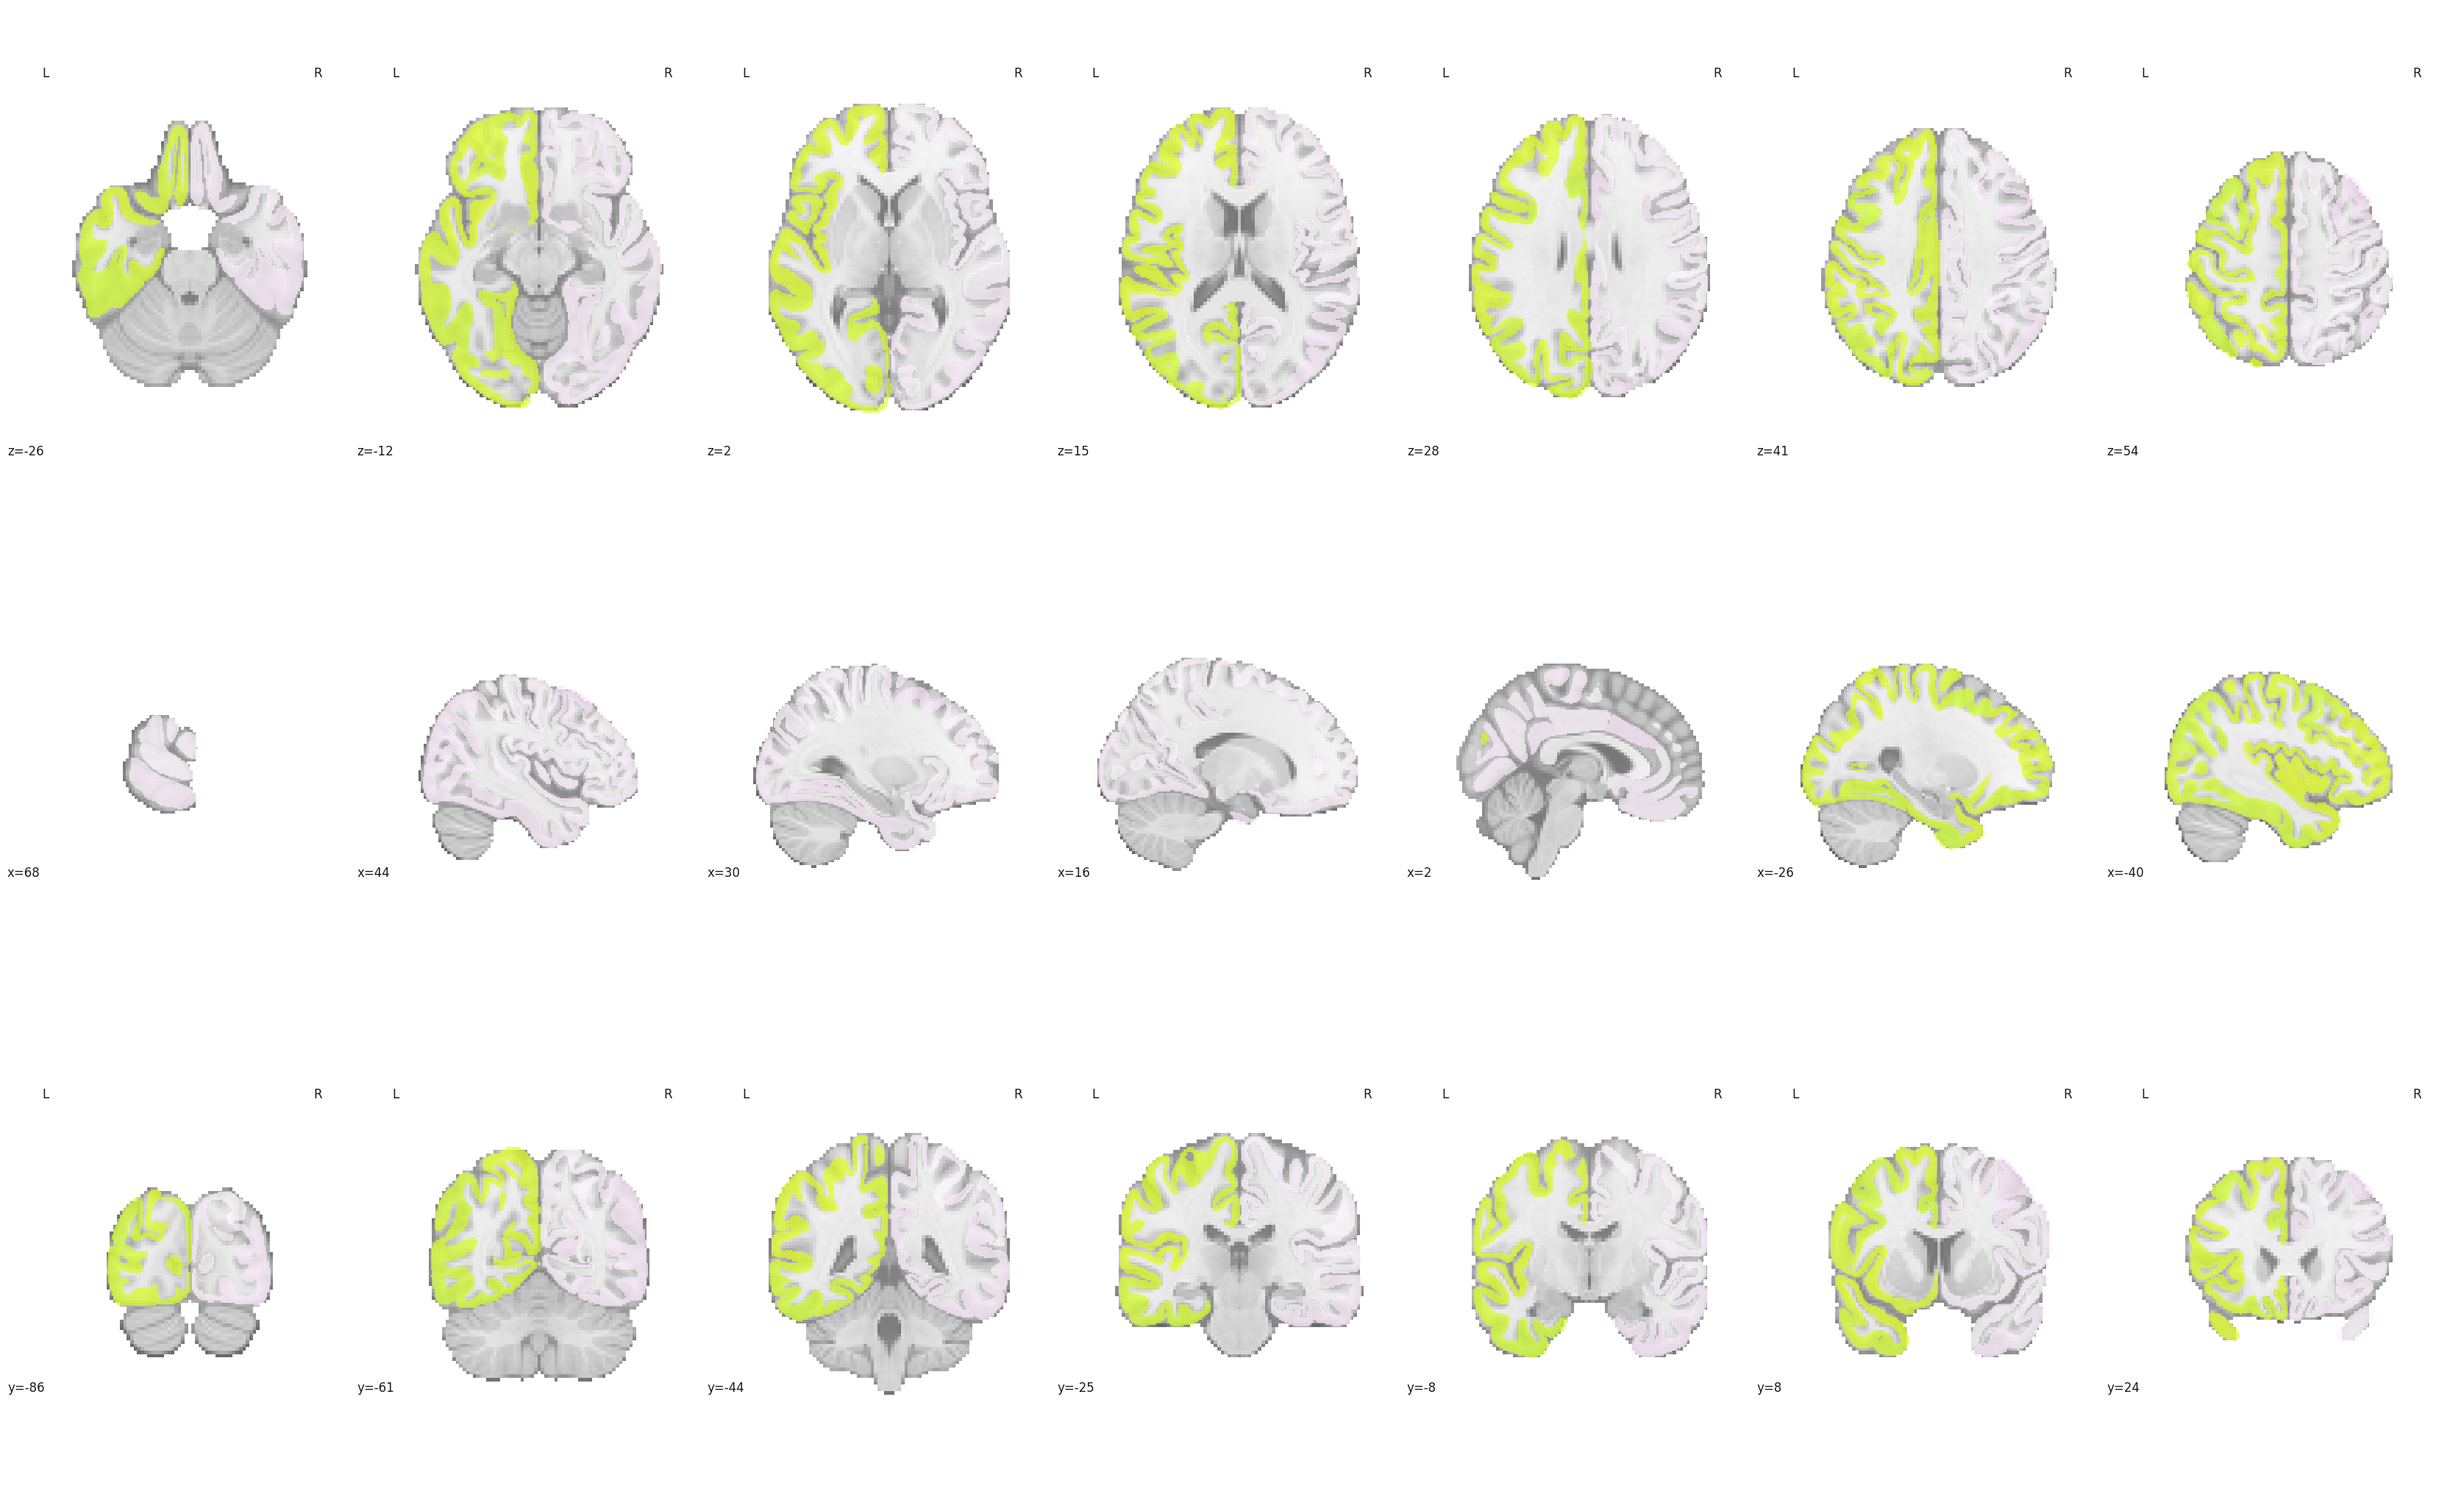

In [ ]:
# Cortex plots
nilp.plot_roi(nib.nifti1.Nifti1Image(dkt_ctx, affine=dkt.nii.affine),
              display_mode="mosaic")

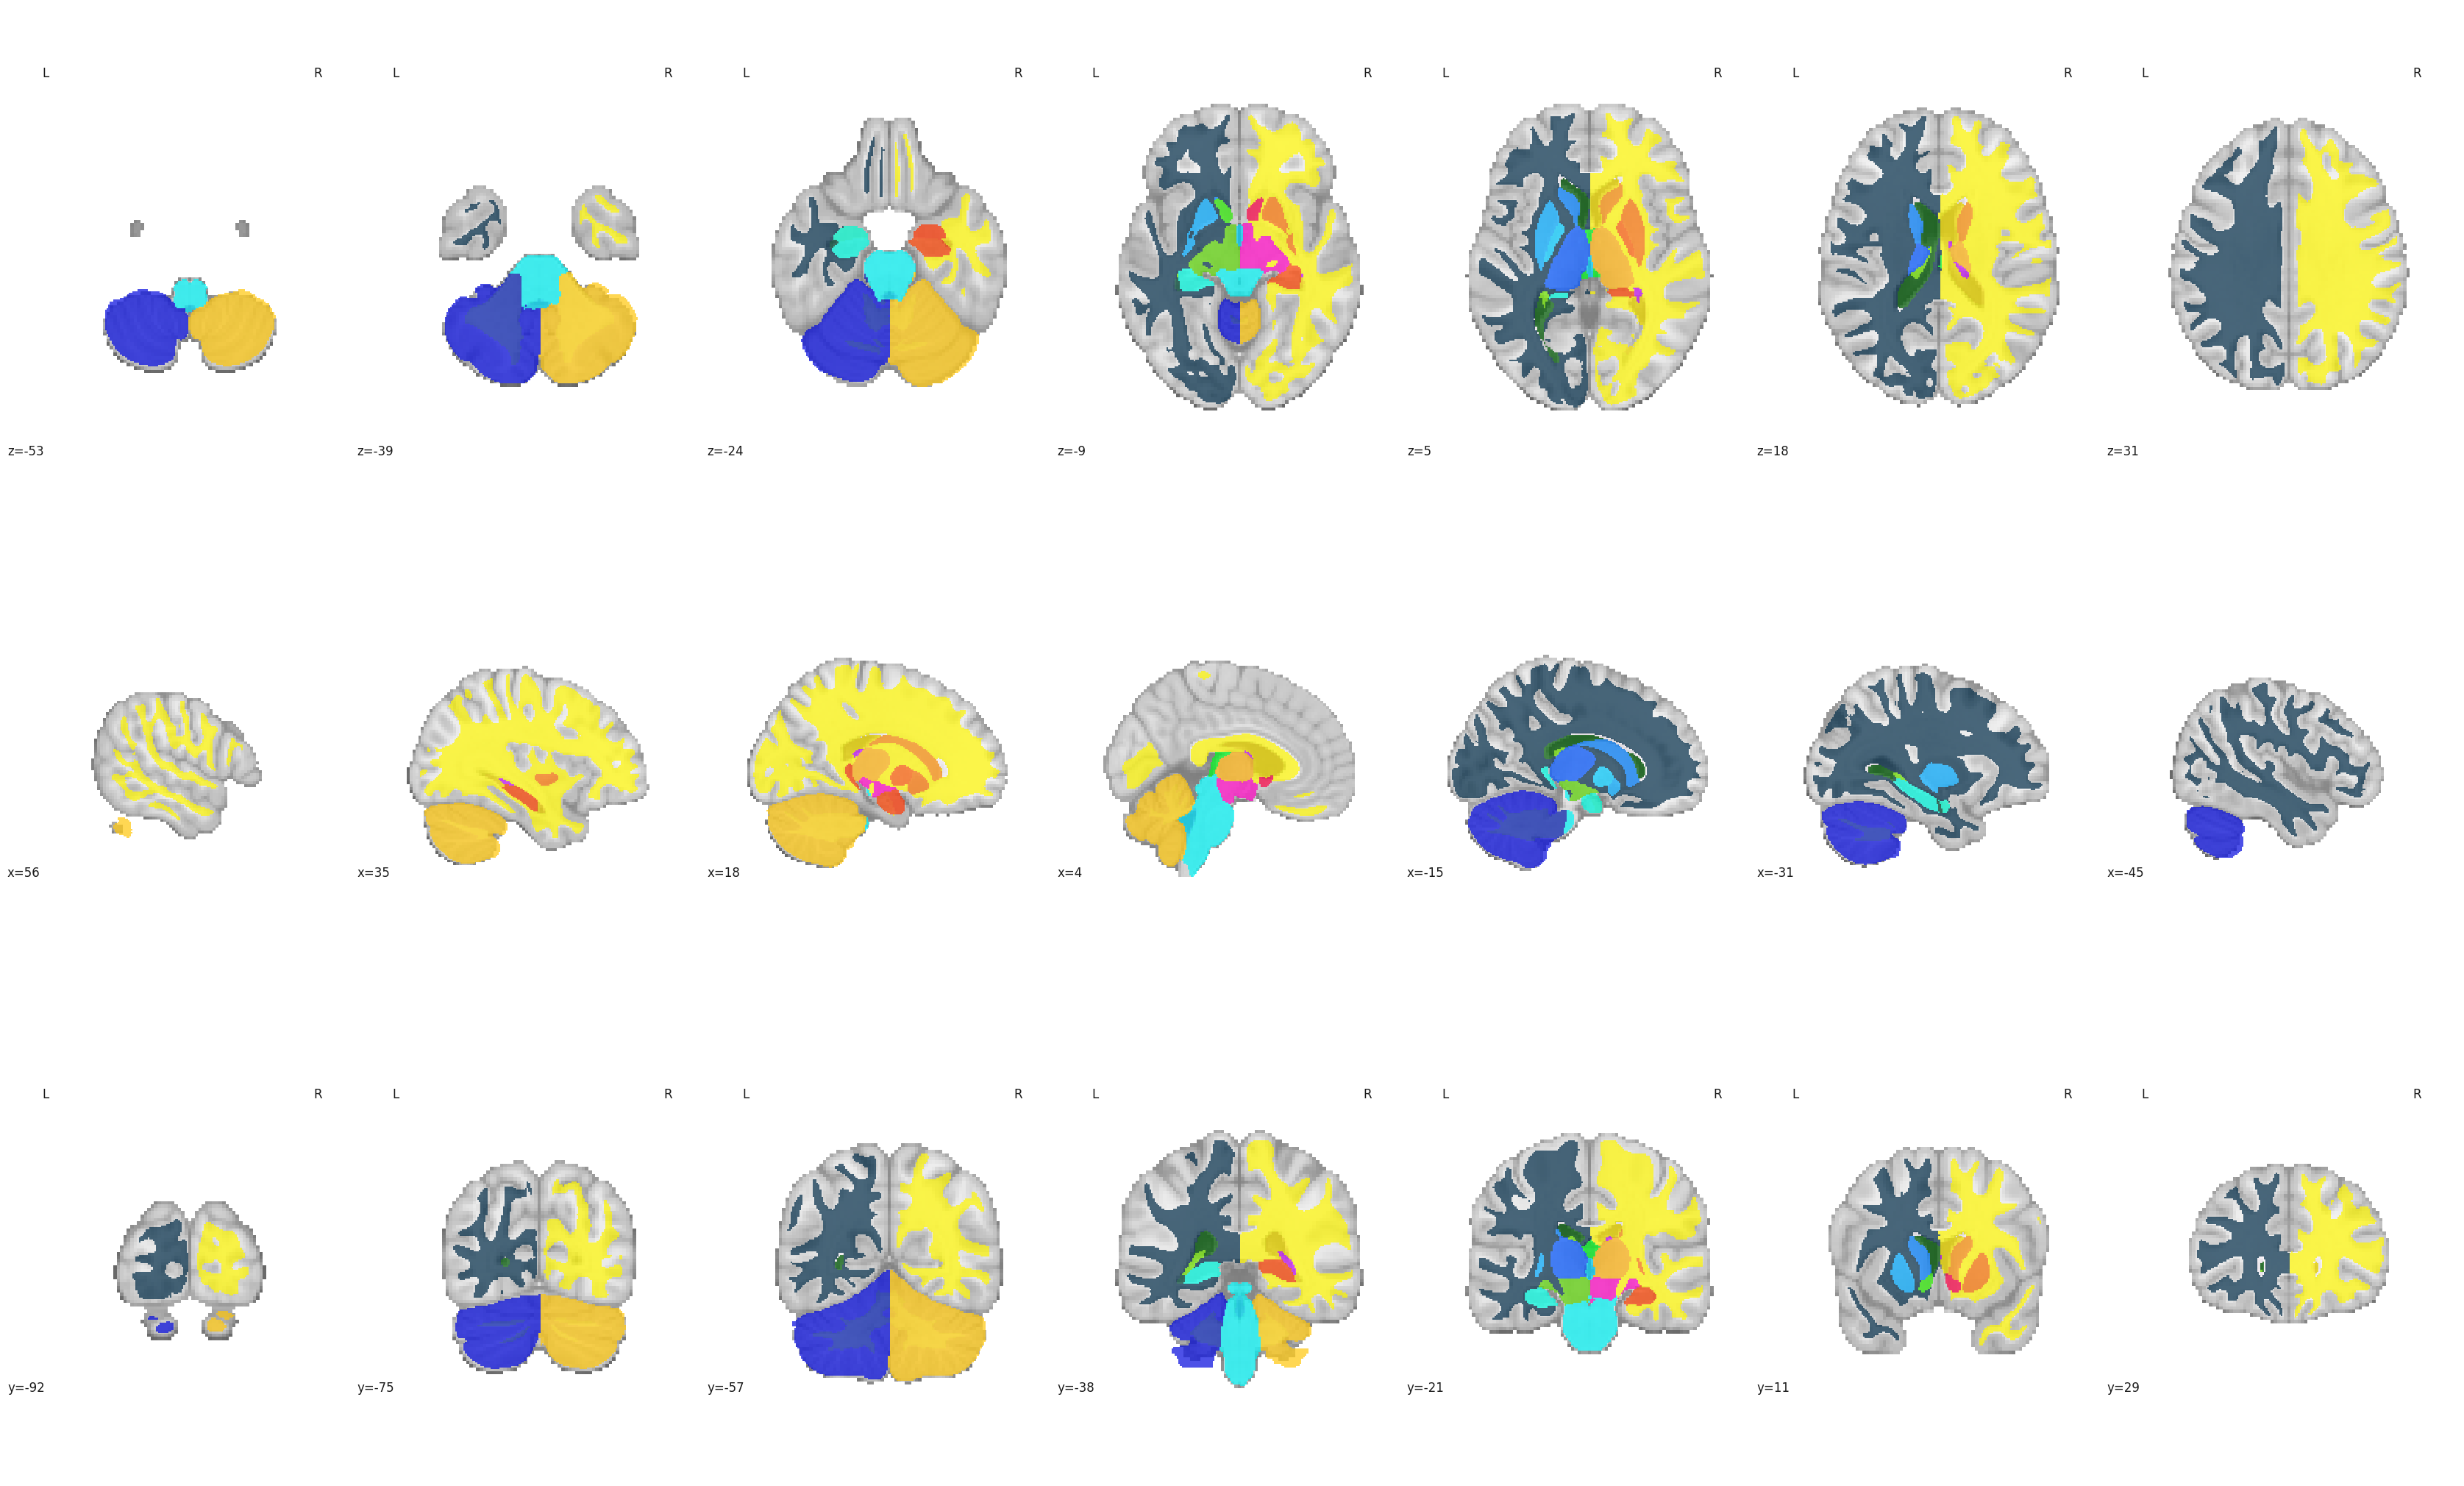

In [ ]:
# Subcortex plot
nilp.plot_roi(nib.nifti1.Nifti1Image(dkt_sub, affine=dkt.nii.affine),
              display_mode="mosaic")

## VBM Results Plots

In [27]:
from metadata import load_vbm, load_vbm_adni
import constants as C_

%cd ..

import json

import numpy as np
import nibabel as nib
import nilearn.image as nili
import seaborn as sns
sns.set_theme()

import sage.constants as C
import sage.xai.nilearn_plots as nilp_

brain_mask = C.load_mni152_brain_mask()
meta_dicts = m.load_metadata()
fs_adni = m.load_fastsurfer_adni()
meta_dicts.keys()

/home/daehyun


dict_keys(['VBM Young-to-old', 'VBM Old-to-Young', 'VBM', 'Fastsurfer Voxel', 'Fastsurfer Intensity'])

In [16]:
vbms = load_vbm()
# VBM affine is currently bank affine
affine, shape = C_.BIOBANK_AFFINE, brain_mask.shape
def preprocess_vbm(img: nib.Nifti1Image):
    # Fillna
    img_nan20_nii = nib.nifti1.Nifti1Image(np.nan_to_num(img.get_fdata(), nan=0), affine=img.affine)
    # Above threshold
    img_nii = nili.resample_img(img=img_nan20_nii, target_affine=affine, target_shape=shape)
    img_arr = np.where(img_nii.get_fdata() >= C_.UKB_FEW_THD, img_nii.get_fdata(), 0)
    return nib.nifti1.Nifti1Image(img_arr, affine=affine)
    
vbm_yo = preprocess_vbm(img=vbms["young2old_nii"])
vbm_oy = preprocess_vbm(img=vbms["old2young_nii"])
vbm_merge = np.maximum(vbm_yo.get_fdata(), vbm_oy.get_fdata())
vbm_merge = np.where(vbm_merge >= C_.UKB_FEW_THD_TWO, vbm_merge, 0)

vbm = load_vbm_adni()["nii"]
vbm_adni = preprocess_vbm(img=vbm)

### UKBiobank

#### Separate

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7f97996f9d50>,
 None)

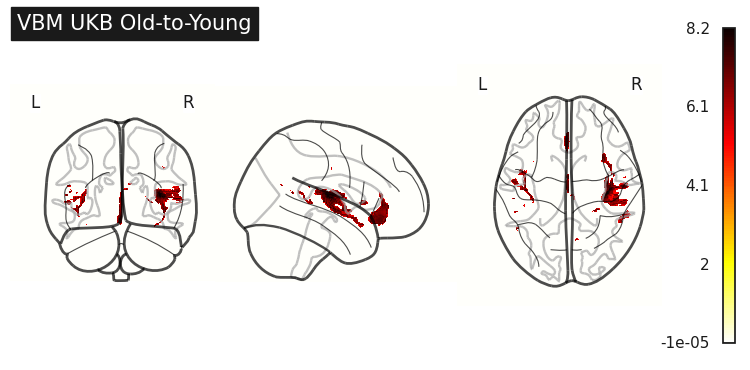

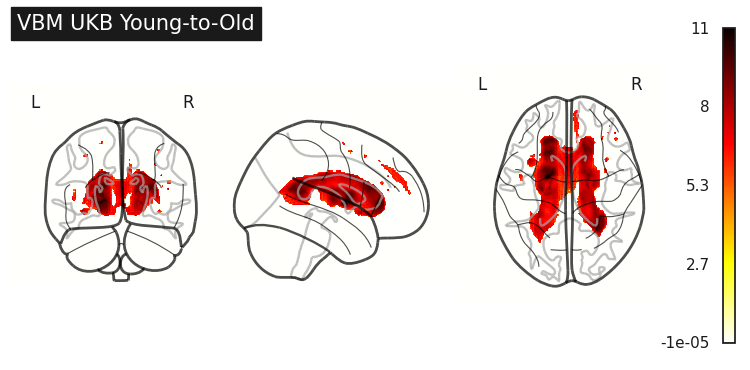

In [17]:
nilp_.plot_glass_brain(vbm_oy, target_affine=affine, colorbar=True, title="VBM UKB Old-to-Young")
nilp_.plot_glass_brain(vbm_yo, target_affine=affine, colorbar=True, title="VBM UKB Young-to-Old")

#### Merge
Merged into a single image   
Note that the direction might as well opposite...

(<nilearn.plotting.displays._slicers.MosaicSlicer at 0x7f978fd82740>, None)

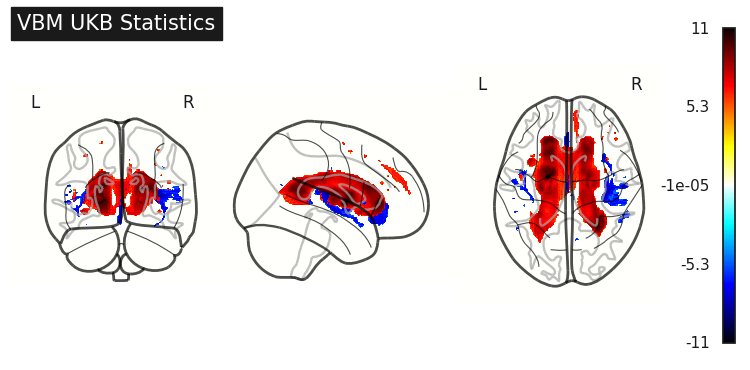

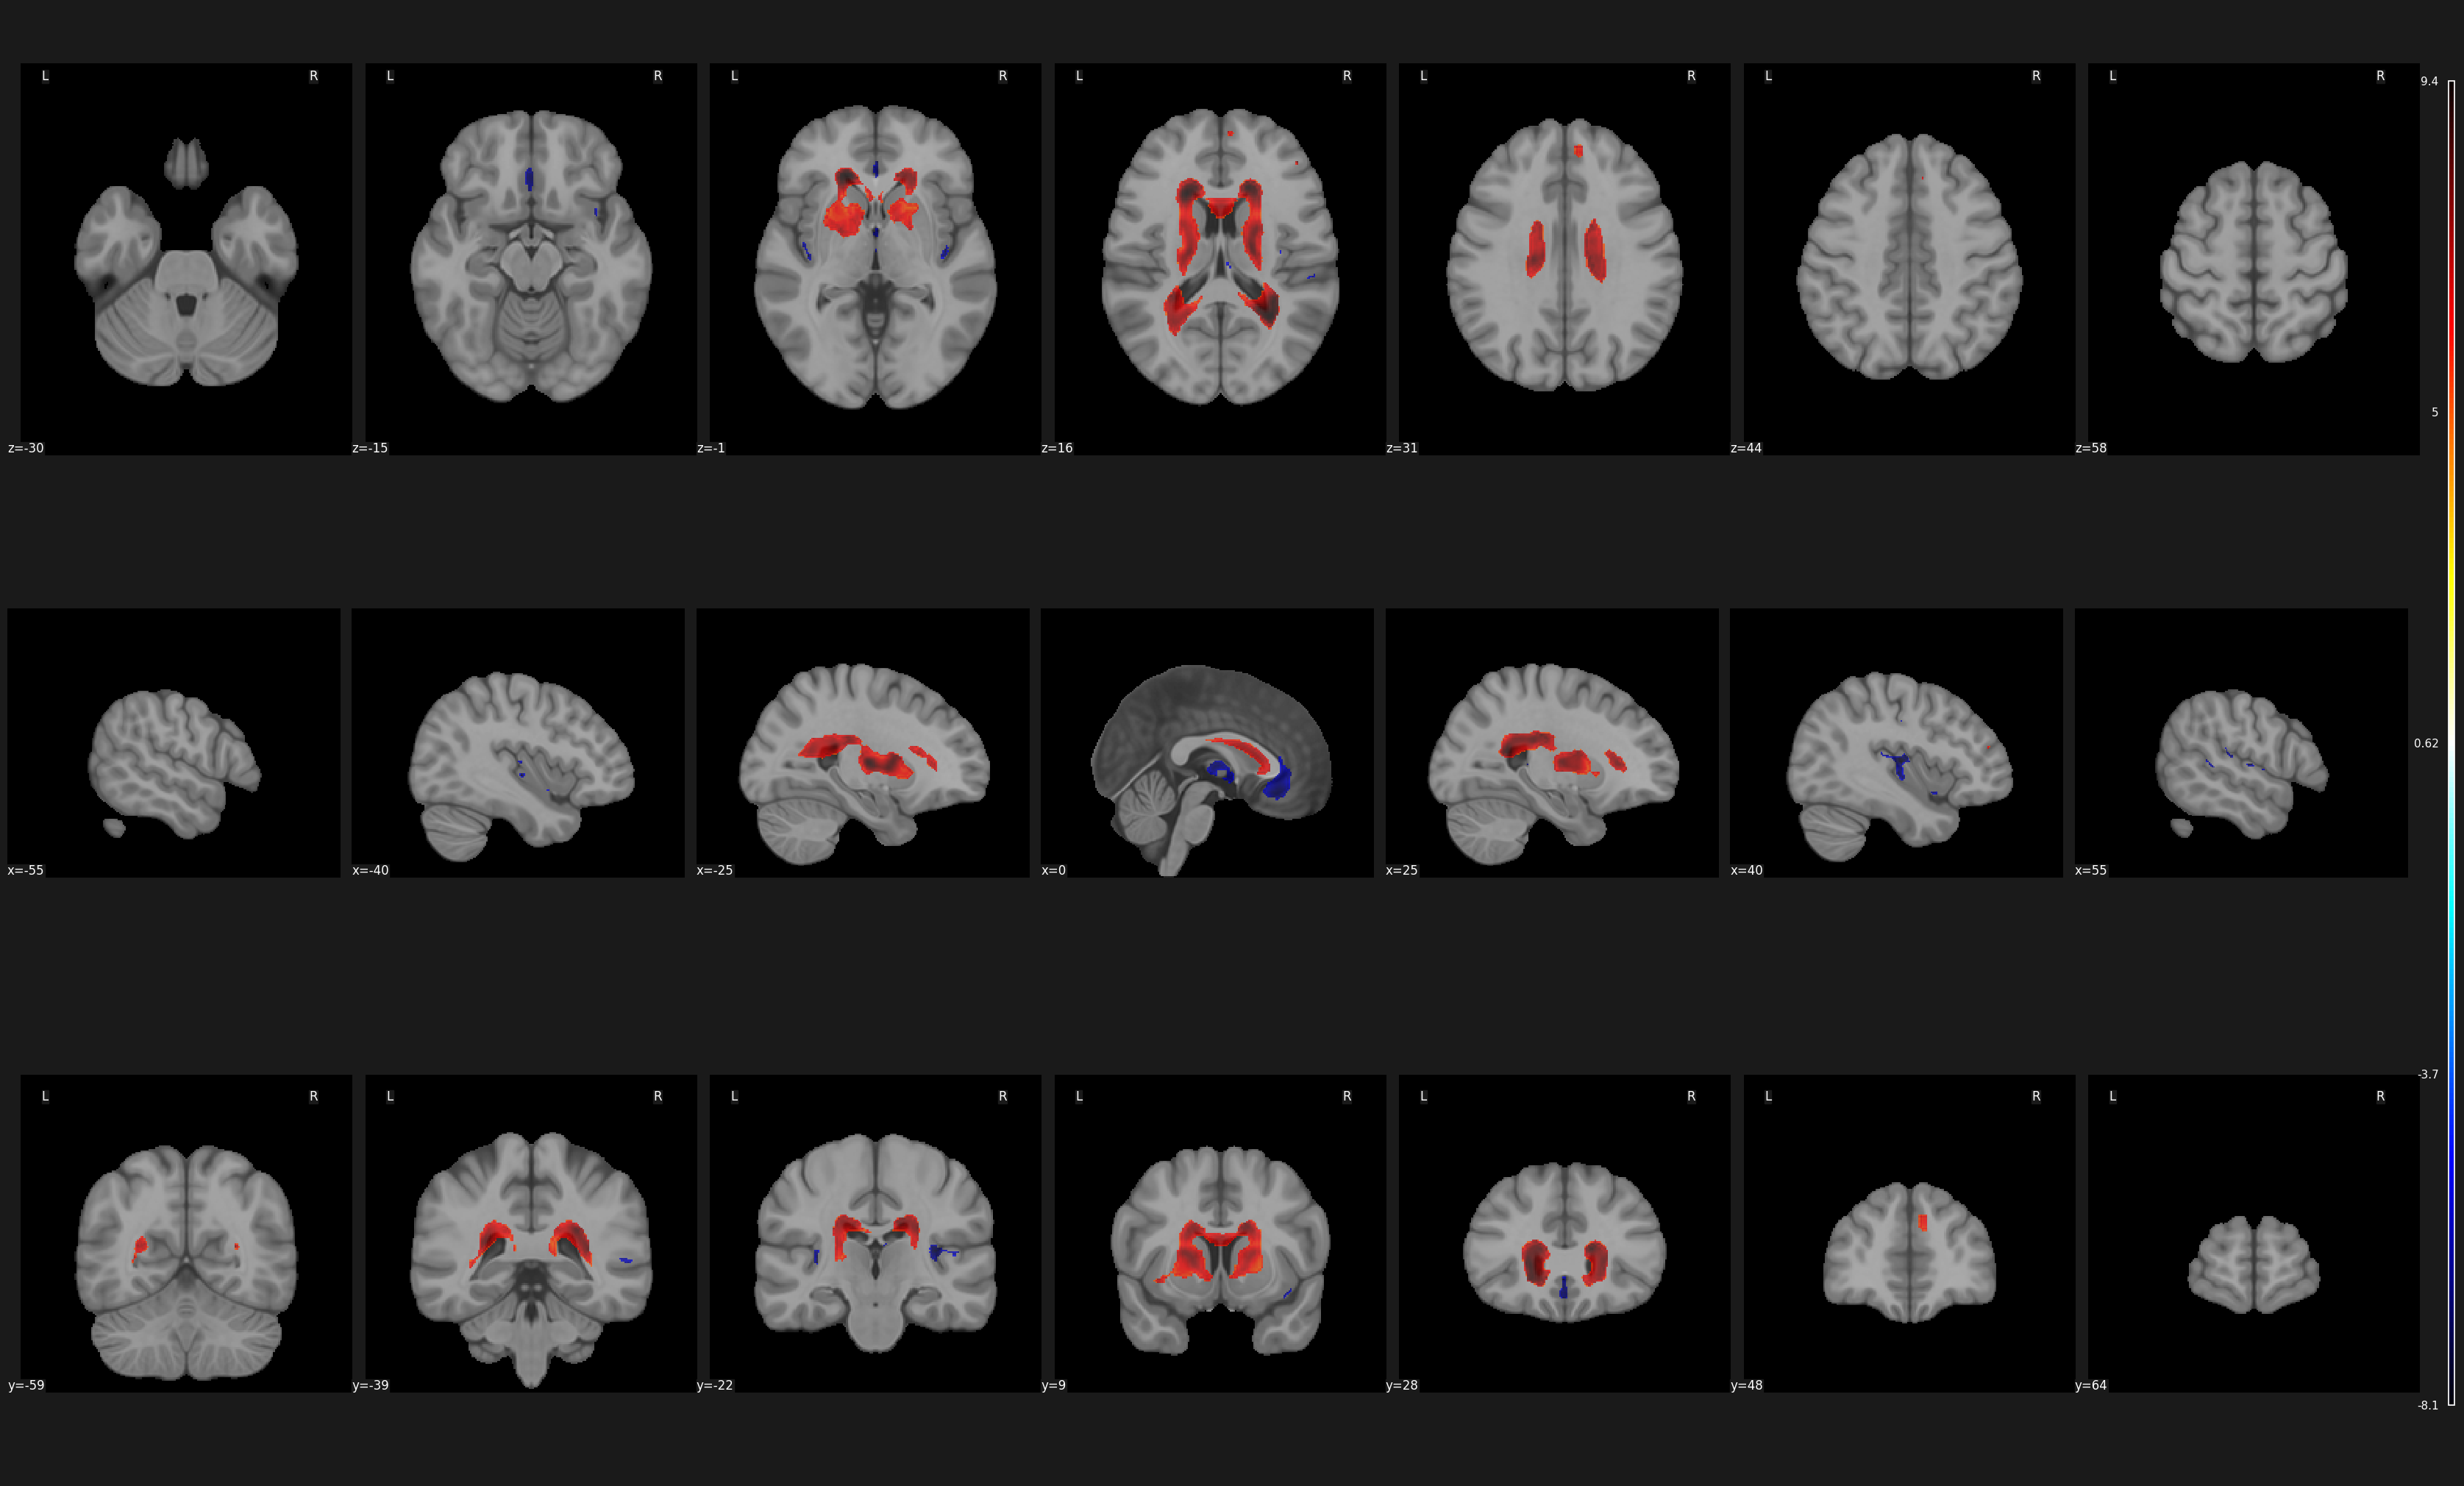

In [18]:
vbm_plot = np.where(vbm_oy.get_fdata() > np.abs(vbm_yo.get_fdata()), -vbm_oy.get_fdata(), vbm_yo.get_fdata())
nilp_.plot_glass_brain(vbm_plot, target_affine=affine, colorbar=True, title="VBM UKB Statistics",
                       plot_abs=False, alpha=0.7)
# save="vbm_ukb.pdf")
nilp_.plot_overlay(vbm_plot, target_affine=affine, display_mode="mosaic", colorbar=True, cmap="cold_white_hot")
                #    save="vbm_ukb_mosaic.pdf")

### ADNI

(<nilearn.plotting.displays._slicers.MosaicSlicer at 0x7f979961b370>, None)

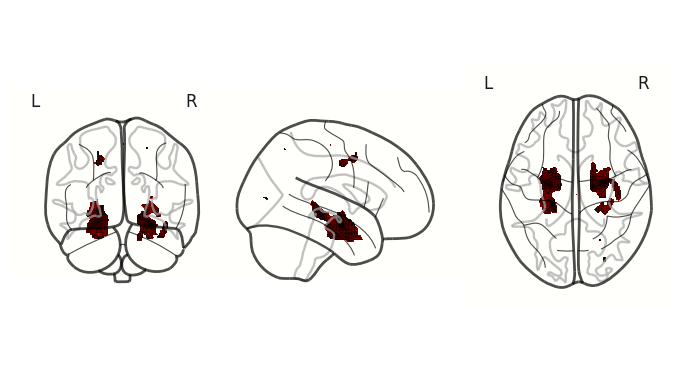

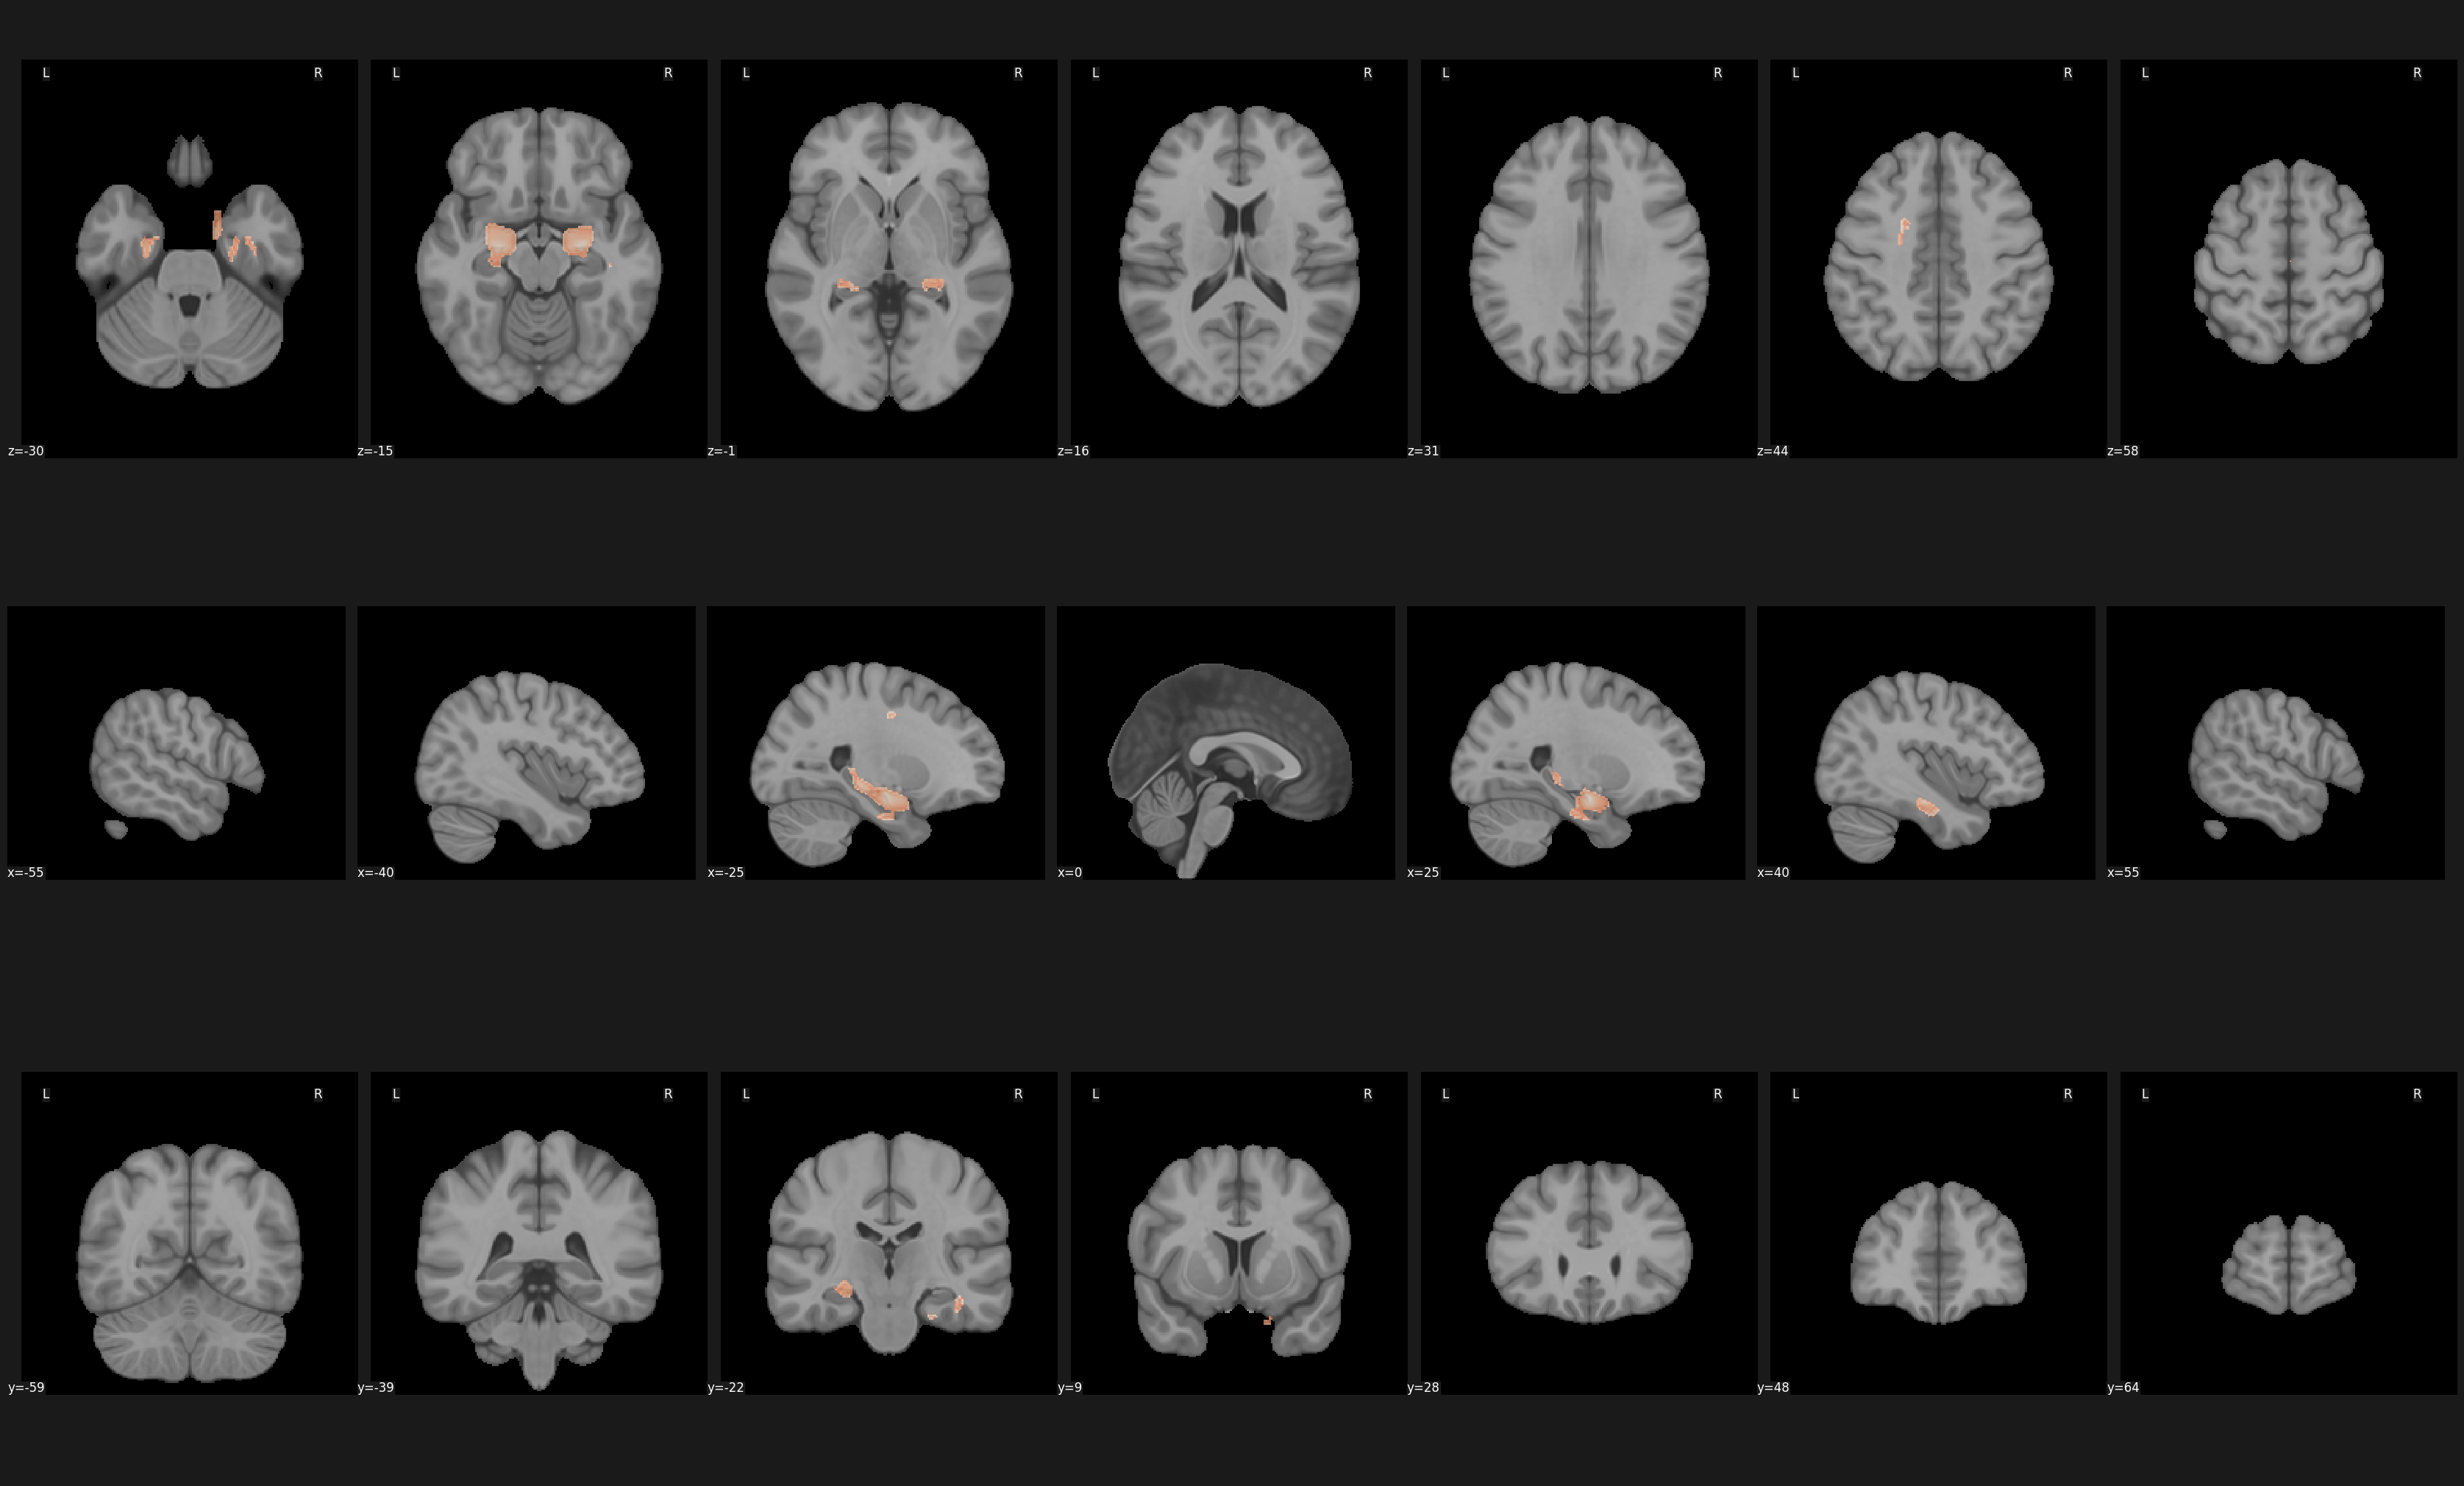

In [19]:
nilp_.plot_glass_brain(vbm_adni)
nilp_.plot_overlay(vbm_adni, display_mode="mosaic")

## Fastsurfer Plots

Spread values to Brain ROI ...:   0%|          | 0/95 [00:00<?, ?it/s]

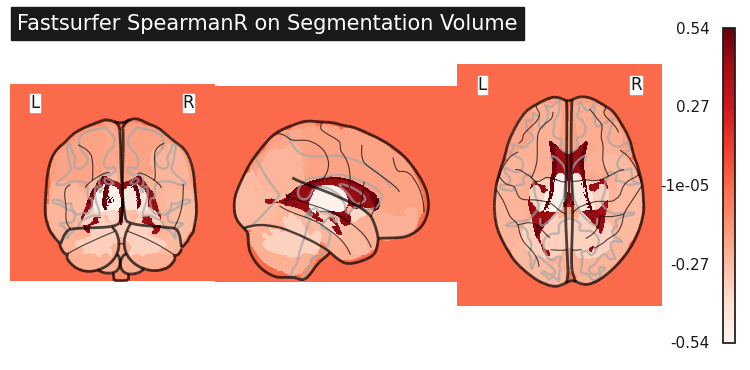

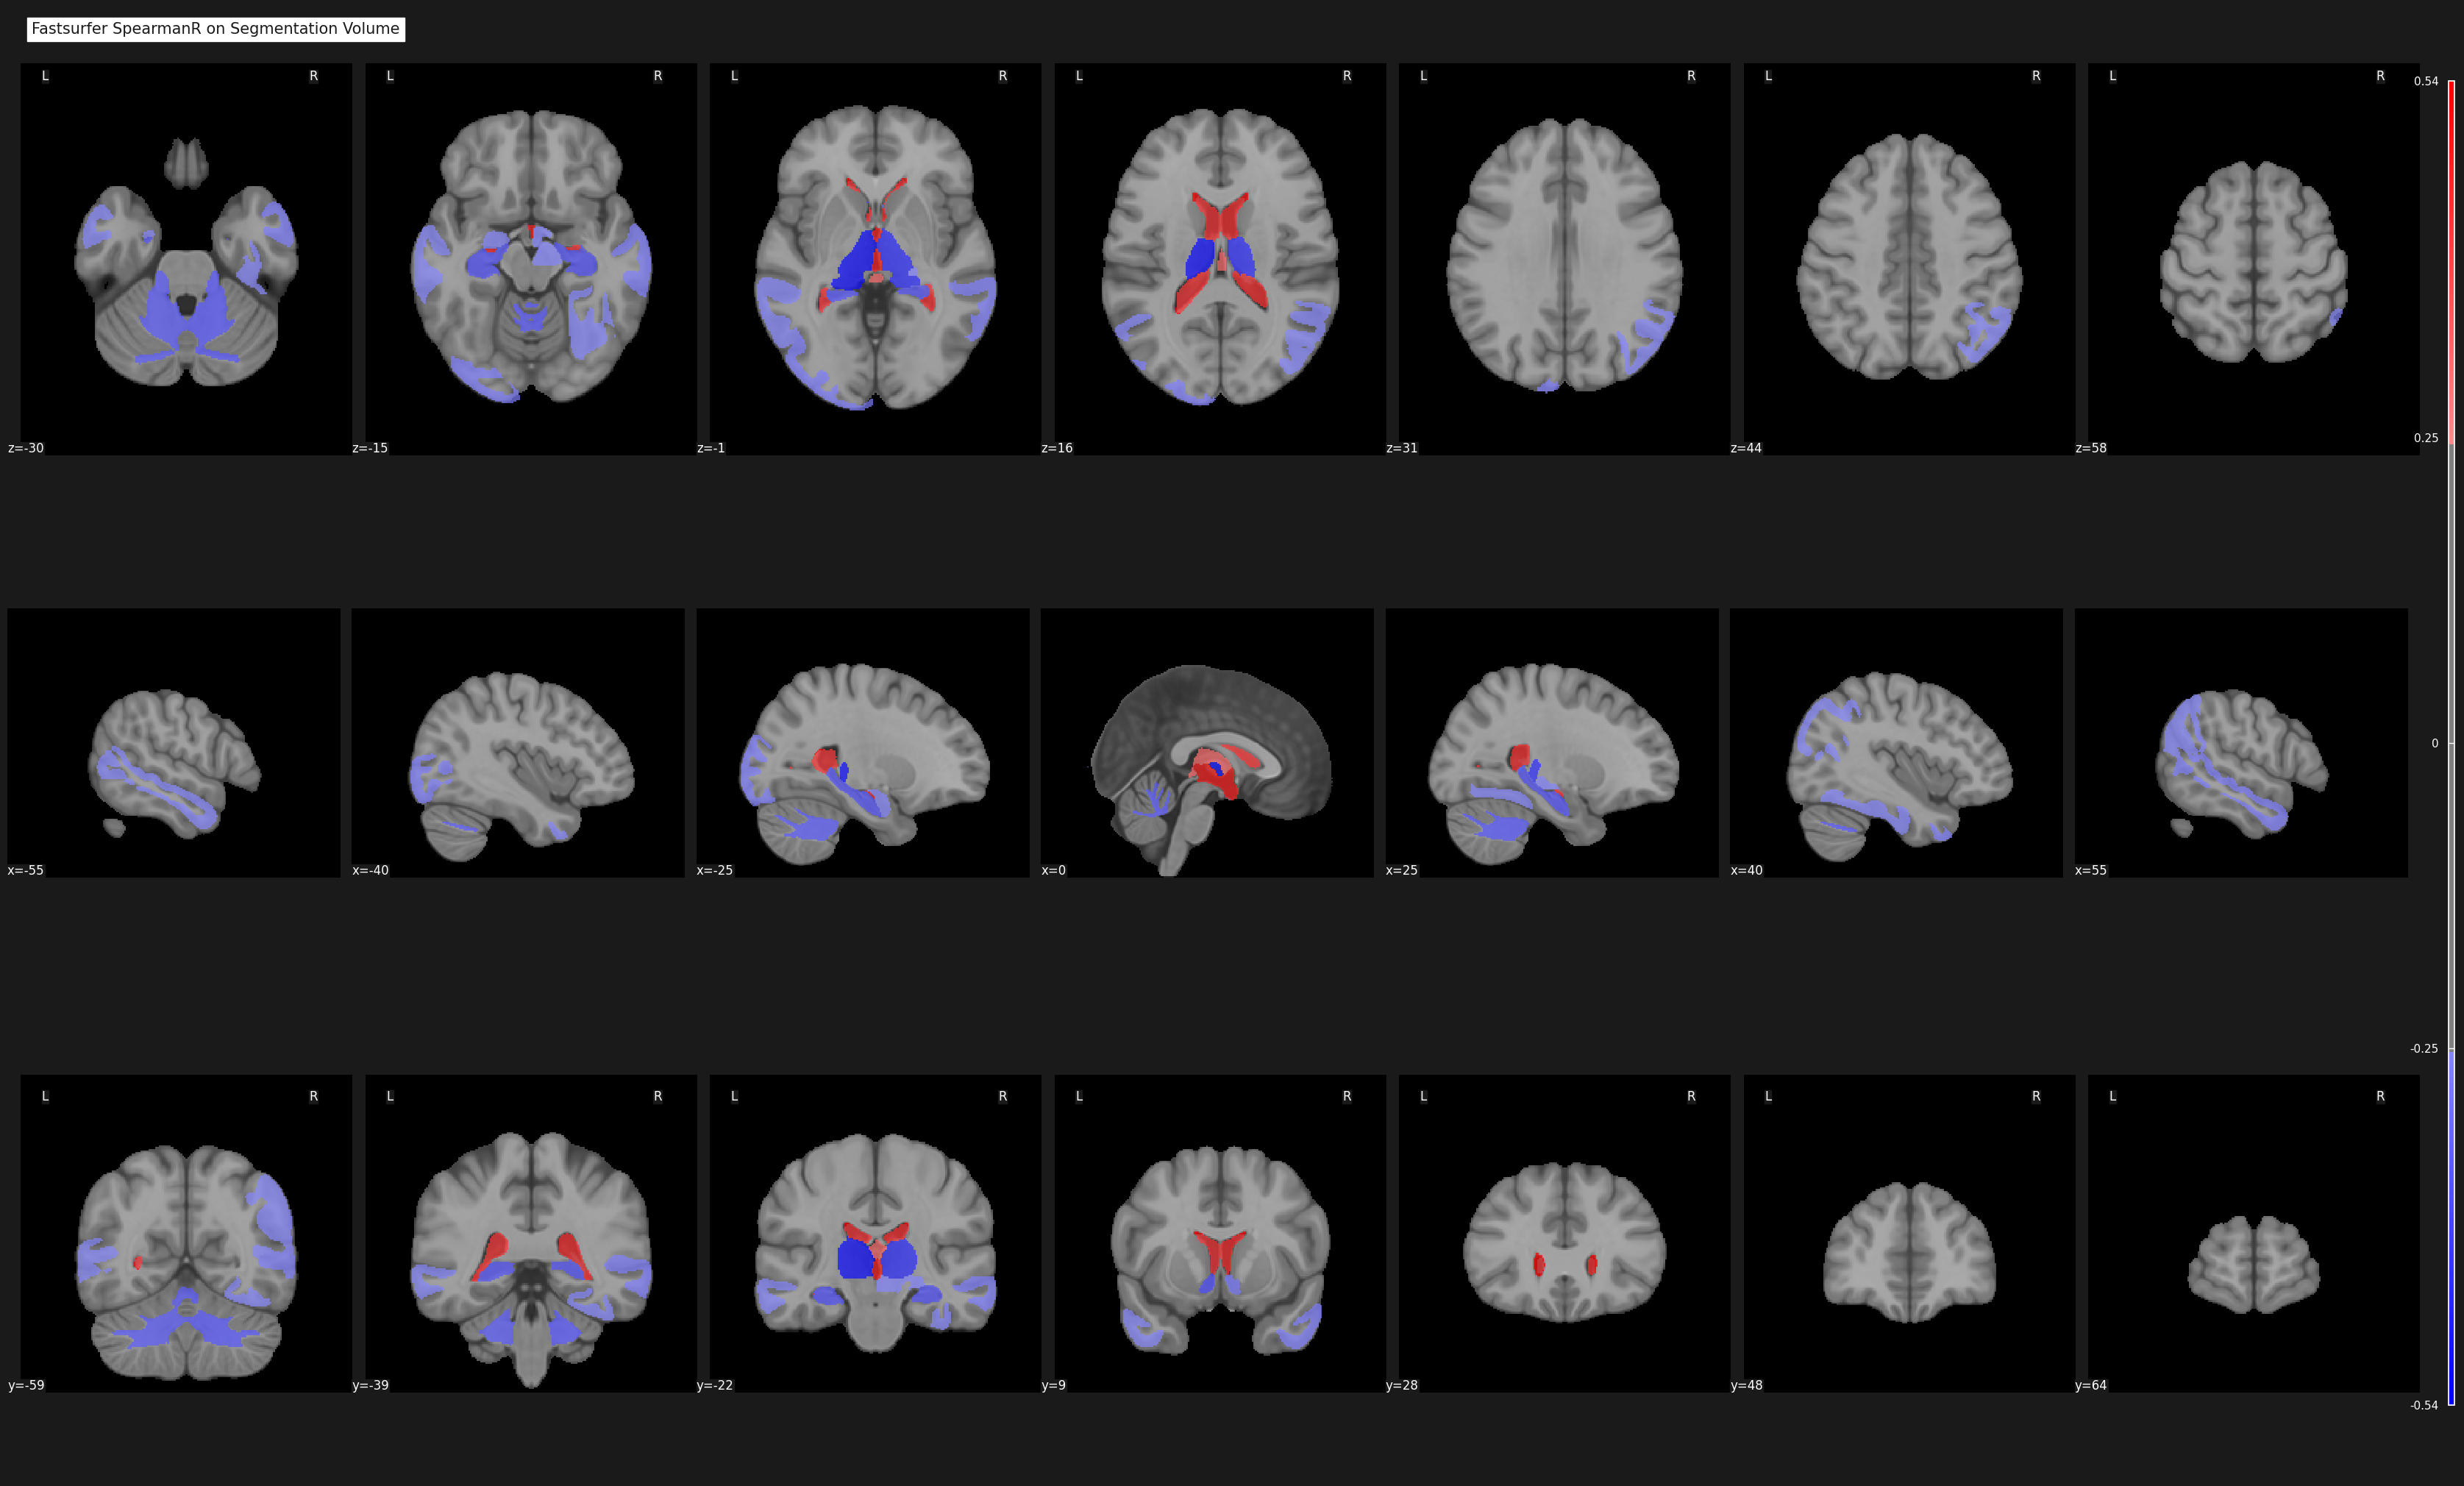

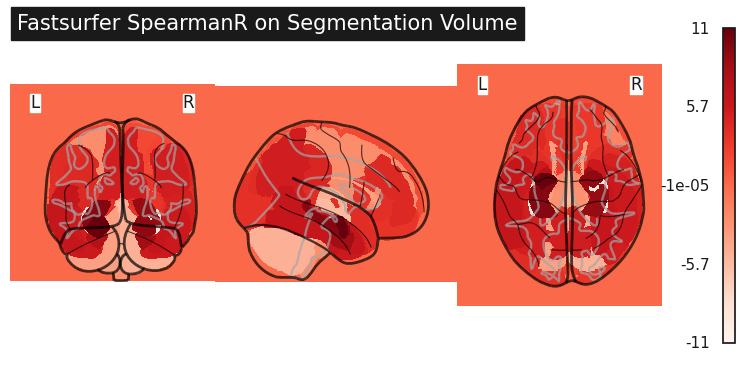

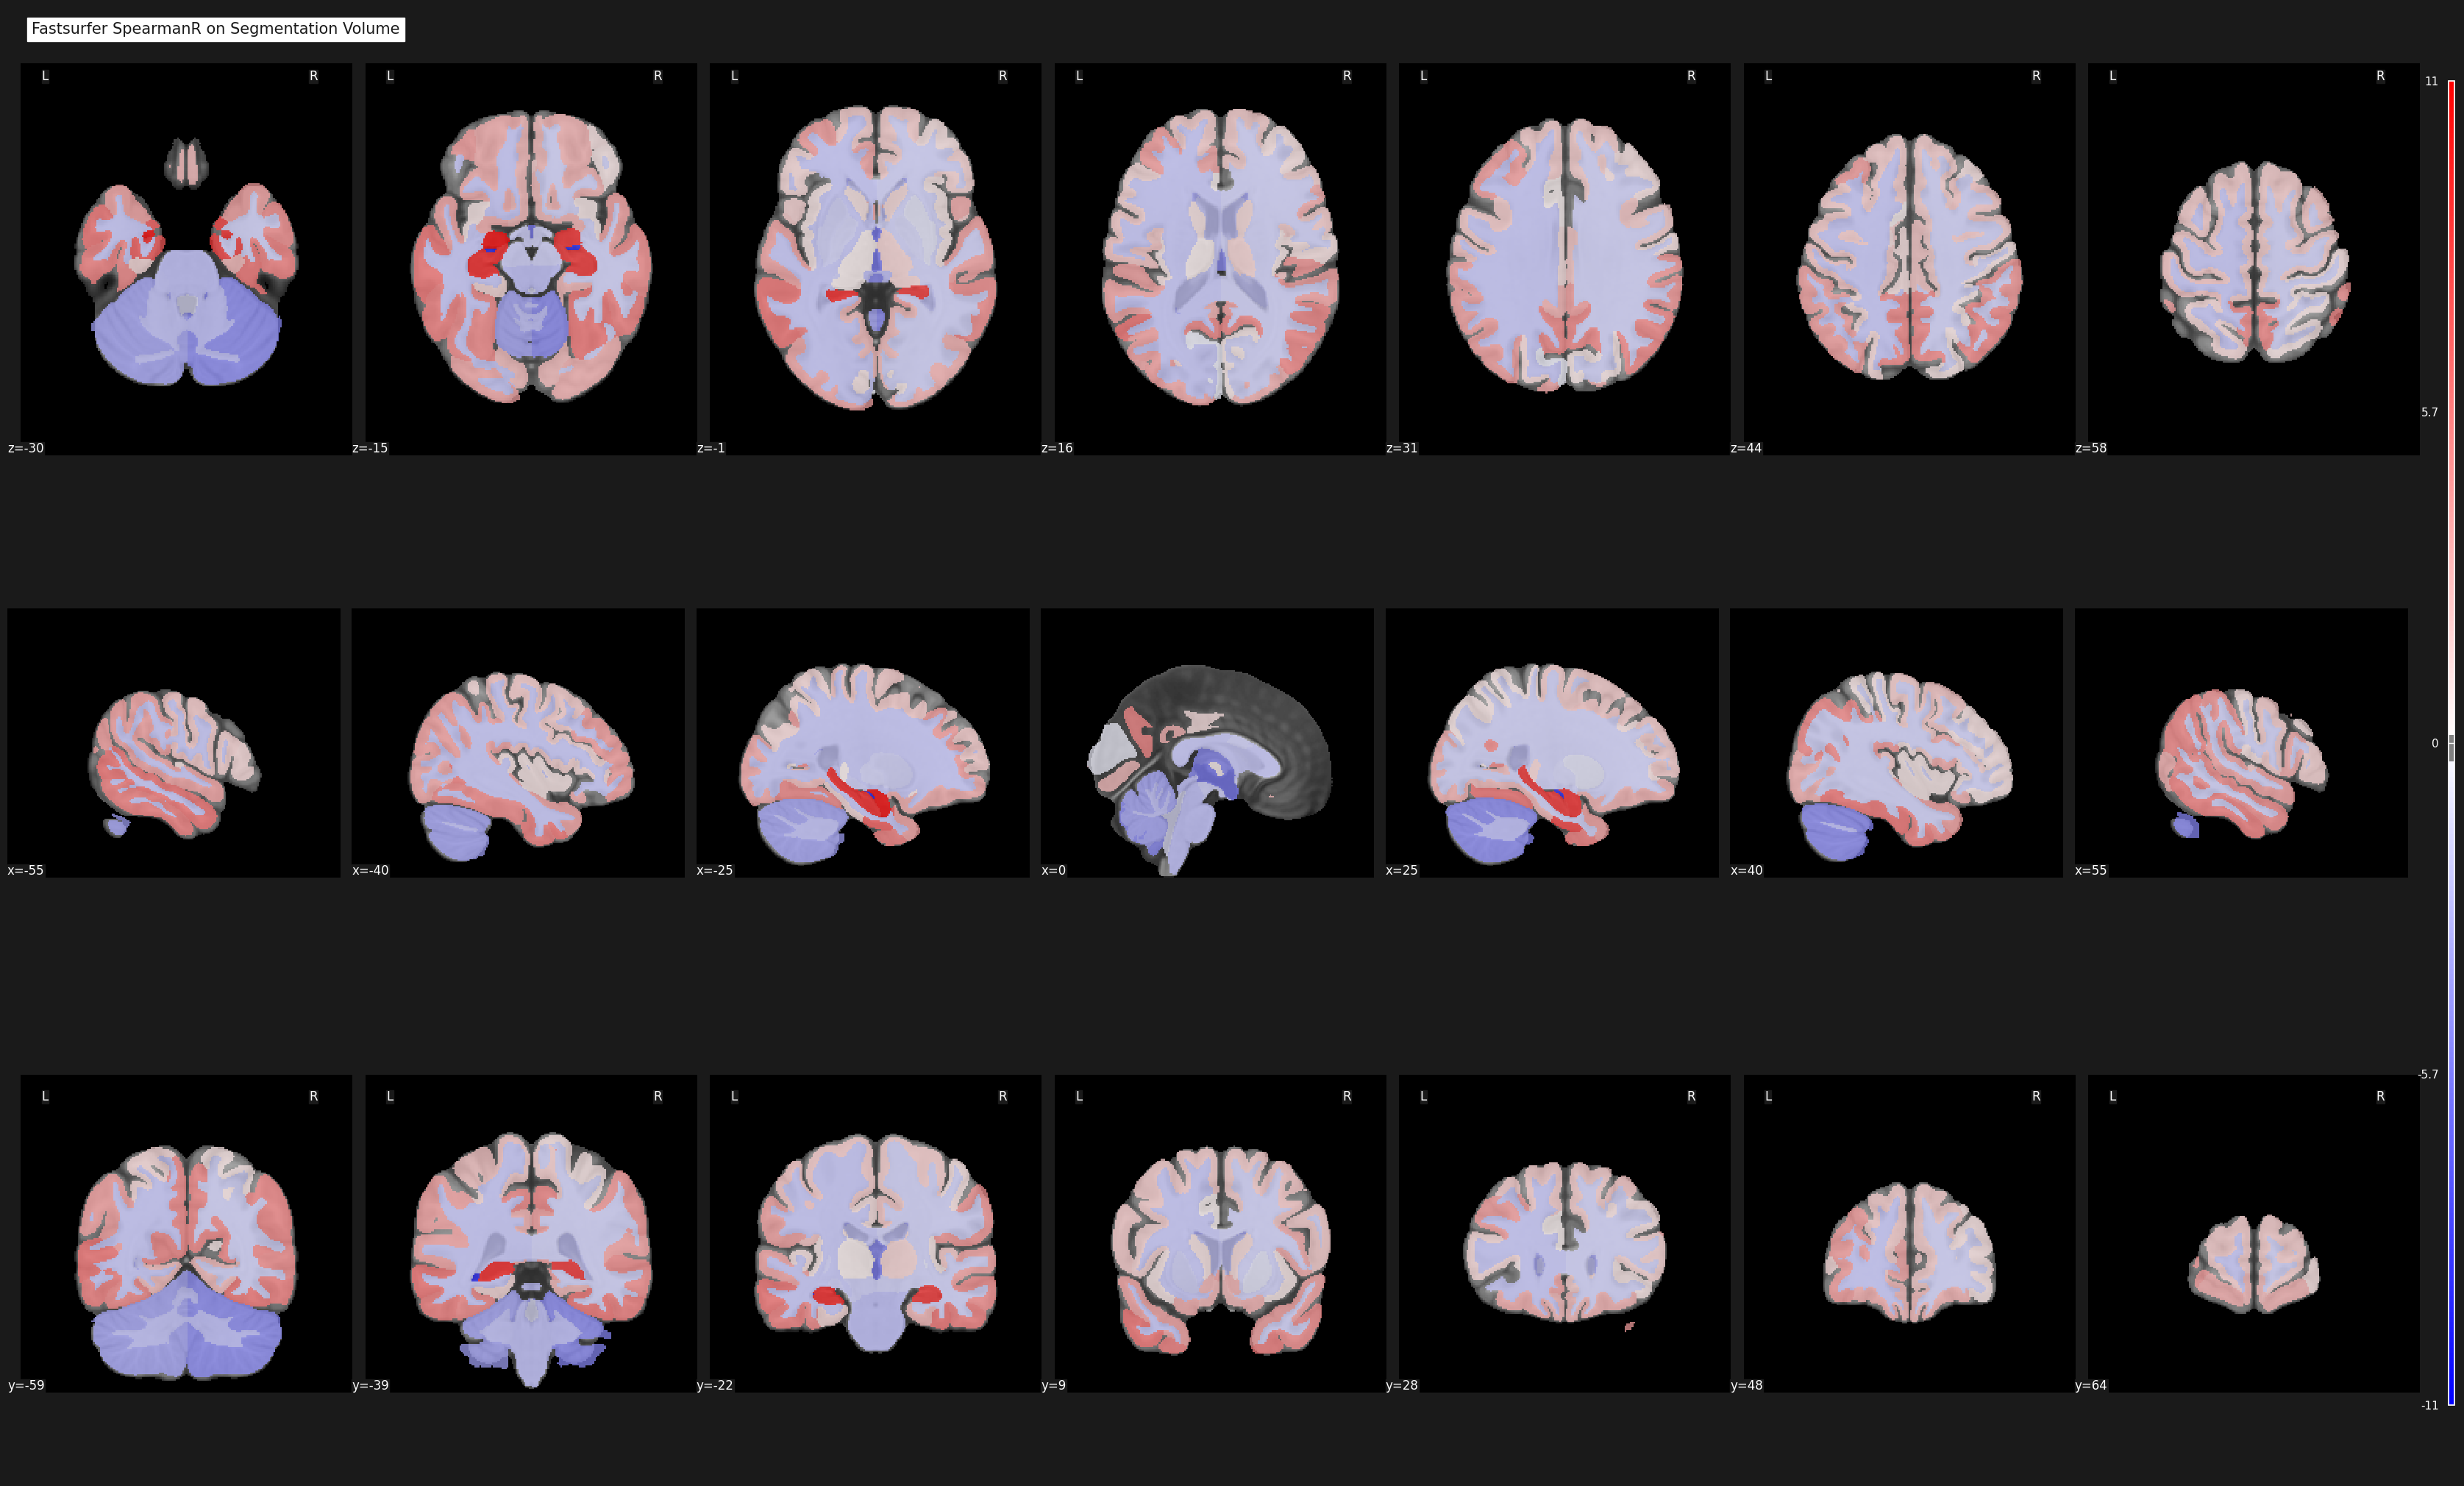

In [28]:
ukb_fs_agg = project_to_atlas(xai_dict={k: v[0] for k, v in meta_dicts["Fastsurfer Voxel"].items()},
                       title=f"Fastsurfer SpearmanR on Segmentation Volume", atlas=dkt, use_abs=False);
adni_fs_agg = project_to_atlas(xai_dict={k: v[0] for k, v in fs_adni["fastsurfer_volume_ttest_dict"].items()},
                       title=f"Fastsurfer SpearmanR on Segmentation Volume", atlas=dkt, use_abs=False);

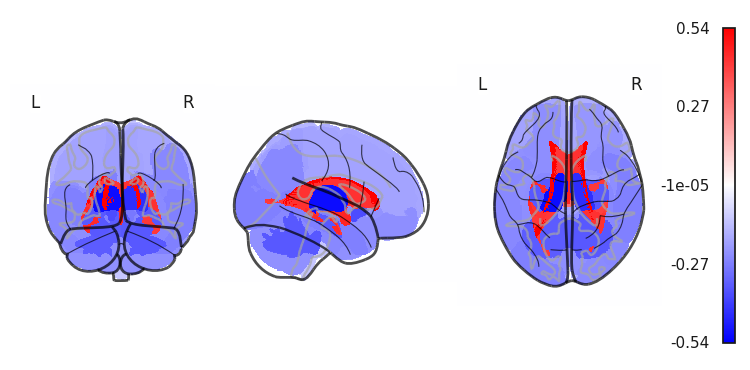

In [29]:
fig, _ = nilp_.plot_glass_brain(arr=ukb_fs_agg, plot_abs=False, cmap="bwr",
                        target_affine=dkt.nii.affine,
                        colorbar=True, save="fs_ukb_vol.pdf")

In [30]:
fig, _ = nilp_.plot_glass_brain(arr=adni_fs_agg, plot_abs=False, cmap="bwr",
                                target_affine=dkt.nii.affine,
                                colorbar=True, save="fs_adni_vol.pdf")

# Demographics

In [12]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

BIOBANK_DIR = Path.home() / "codespace" / "brain-age-prediction" / "biobank"

train_df = pd.read_csv(BIOBANK_DIR / "ukb_trainval_age_exist240221.csv")
test_df = pd.read_csv(BIOBANK_DIR / "ukb_test_age_exist240221.csv")
sex_df = pd.read_csv(BIOBANK_DIR / "biobank_agesex_all.csv", usecols=[0, 1, 3])

train_df['eid'] = train_df.fname.map(lambda s: int(s.split("_")[0]))
test_df['eid'] = test_df.fname.map(lambda s: int(s.split("_")[0]))

train_df = pd.merge(train_df, sex_df, on="eid")
test_df = pd.merge(test_df, sex_df, on="eid")
full_df = pd.concat([train_df, test_df])

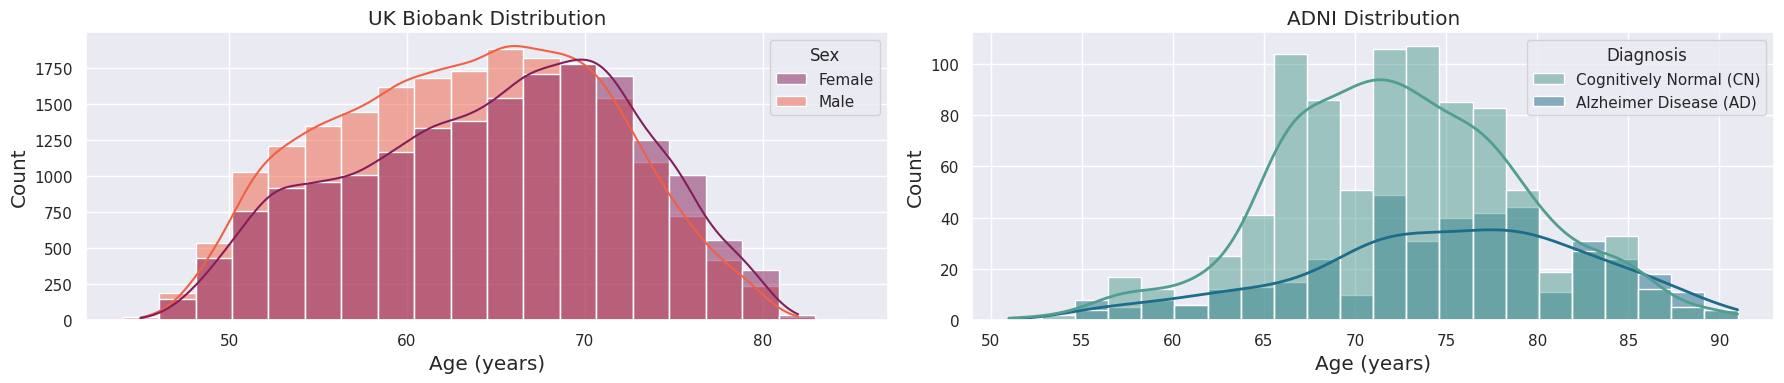

In [13]:
fig, axs = plt.subplots(figsize=(18, 4), ncols=2)

# UKB
ax = axs[0]
full_df = full_df.rename(columns={"gender": "Sex"})
full_df.Sex = full_df.Sex.replace({0: "Male", 1: "Female"})

sns.histplot(data=full_df, x="age", bins=20, kde=True, ax=ax,
             palette="rocket",
             binrange=(44, 85), alpha=0.5, hue="Sex")

ax.set_title("UK Biobank Distribution", size="large")
ax.set_xlabel("Age (years)", size="large")
ax.set_ylabel("Count", size="large")
fig.savefig("demographics.png", dpi=150, bbox_inches="tight")

# ADNI
ax = axs[1]
adni_df = pd.read_csv("../adni/adni_screen_labels_Sept11_test15_2024.csv")
adni_df = adni_df[adni_df.DX_bl.isin(["CN", "AD"])]

_df = adni_df.copy()
_df = _df.rename(columns={"DX_bl": "Diagnosis"})
_df = _df.replace(to_replace={"CN": "Cognitively Normal (CN)",
                              "AD": "Alzheimer Disease (AD)"})

sns.histplot(_df, x="Age", hue="Diagnosis", fill=True, kde=True, line_kws={"linewidth": 2},
             palette="crest", ax=ax)
ax.set_title("ADNI Distribution", size="large")
ax.set_xlabel("Age (years)", size="large")
ax.set_ylabel("Count", size="large")

fig.tight_layout()
fig.savefig(f"demogrpahics.pdf", format="pdf", dpi=100, bbox_inches='tight')